In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("clinical_records.csv")
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
89,57.0,1,115,0,25,1,181000.0,1.1,144,1,0,79,0
90,70.0,0,66,1,45,0,249000.0,0.8,136,1,1,80,0
172,70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,0
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,0,215,0
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
disease = len(df[df["DEATH_EVENT"] == 1])
no_disease = len(df[df["DEATH_EVENT"] == 0])

In [7]:
disease

96

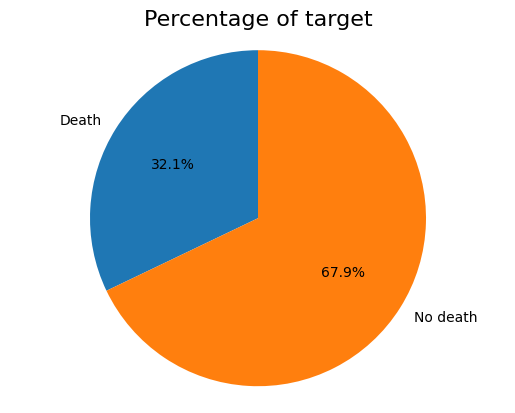

In [8]:
y = ("Death", "No death")
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = "Death", "No death"
sizes = [disease, no_disease]
fig, ax = plt.subplots()
ax.pie(sizes,  labels=labels, autopct="%1.1f%%", startangle=90)         #autopct are the % values
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of target", size=16)
plt.show()

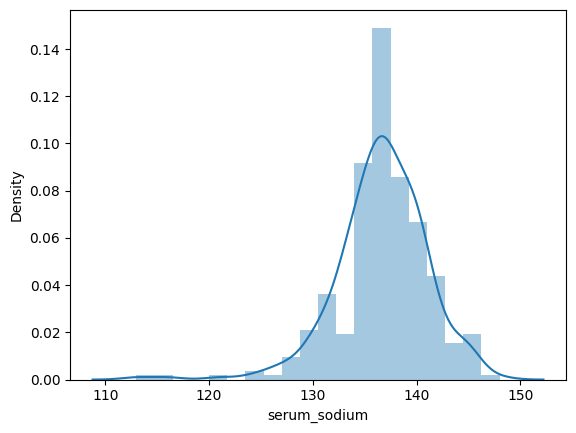

In [9]:
ax = sns.distplot(df["serum_sodium"], bins = 20)

In [10]:
x = df.drop("DEATH_EVENT", axis = 1)

In [11]:
y = df["DEATH_EVENT"]
print("Shape of x and y vars respectively: ", x.shape, y.shape)

Shape of x and y vars respectively:  (299, 12) (299,)


In [12]:
x.sample(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
244,54.0,0,582,1,38,0,264000.0,1.8,134,1,0,213
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1,65
19,48.0,1,582,1,55,0,87000.0,1.9,121,0,0,15


In [13]:
y.sample(3)

272    0
235    0
65     1
Name: DEATH_EVENT, dtype: int64

In [14]:
y.unique()

array([1, 0], dtype=int64)

In [15]:
#machine learning algorithm
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
print("x and y train are: ", x_train.shape, y_train.shape)
print("x and y test are: ", x_test.shape, y_test.shape)

x and y train are:  (224, 12) (224,)
x and y test are:  (75, 12) (75,)


In [16]:
#LOGISTIC REGRESSION
print("LOGISTIC REGRESSION")
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
print("Model training score: ", score)

score = model.score(x_test, y_test)
print("Model testing score: ", score)
score_logreg = score


#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION
Model training score:  0.8482142857142857
Model testing score:  0.7733333333333333
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        47
           1       0.74      0.61      0.67        28

    accuracy                           0.77        75
   macro avg       0.76      0.74      0.75        75
weighted avg       0.77      0.77      0.77        75



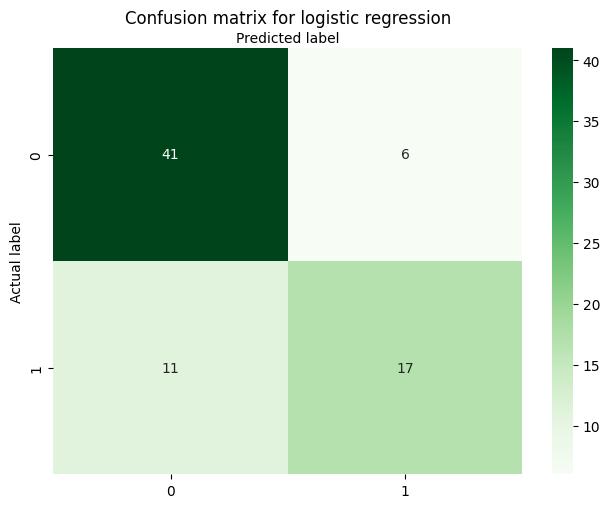

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = "Greens", fmt = "g")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix for logistic regression")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

In [18]:
#DECISION TREE CLASSIFIER
print("Decision Tree classifier")
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth = 10)
d_tree.fit(x_train, y_train)
y_pred = d_tree.predict(x_test)

score = d_tree.score(x_train, y_train)
print("Model training score: ", score)
score = d_tree.score(x_test, y_test)
print("Model testing score: ", score)

score_dtree = score
print(classification_report(y_test,y_pred))

Decision Tree classifier
Model training score:  1.0
Model testing score:  0.7466666666666667
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        47
           1       0.66      0.68      0.67        28

    accuracy                           0.75        75
   macro avg       0.73      0.73      0.73        75
weighted avg       0.75      0.75      0.75        75



In [19]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

score = model.score(x_test, y_test)
print("Model training score: ", score)
score = model.score(x_test, y_test)
print("Model testing score: ", score)

score_rfc = score
print("\n", classification_report(y_test,y_pred))

Model training score:  0.84
Model testing score:  0.84

               precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.83      0.71      0.77        28

    accuracy                           0.84        75
   macro avg       0.84      0.81      0.82        75
weighted avg       0.84      0.84      0.84        75



Text(0.5, 1.0, 'Which one is the best algorithm?')

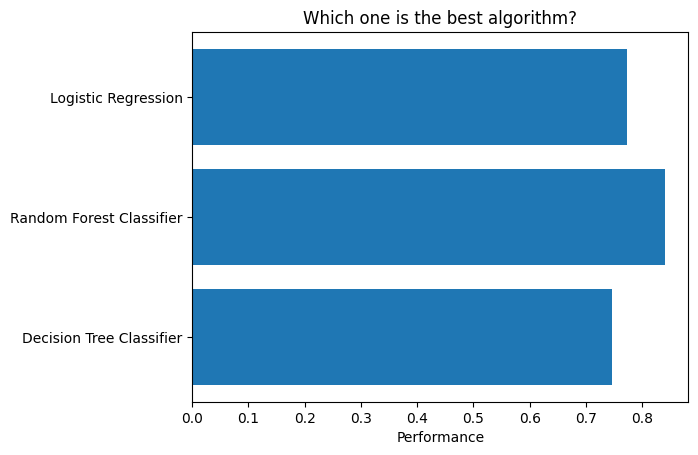

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots()

algorithms = ("Logistic Regression", "Random Forest Classifier", "Decision Tree Classifier")
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_rfc, score_dtree) # scores

ax.barh(y_pos, x, align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)

ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel("Performance")
ax.set_title("Which one is the best algorithm?")

In [21]:
#FINAL RESULTS - Storing all the values in a dataframe
results=pd.DataFrame(columns = ["score"])

results.loc["Logistic Regression"] = [score_logreg]
results.loc["Decision Tree Classifier"] = [score_dtree]
results.loc["Random Forest Classifier"] = [score_rfc]

results

,score
Logistic Regression,0.773333
Decision Tree Classifier,0.746667
Random Forest Classifier,0.840000


In [22]:
results.sort_values("score", ascending=False).style.background_gradient(cmap = "Greens", subset = ["score"])

,score
Random Forest Classifier,0.840000
Logistic Regression,0.773333
Decision Tree Classifier,0.746667


In [23]:
#hence random forest classifier the best results among the three classification algorithms